In [ ]:
"""
Zadanie 2.

Przygotuj chmurę słów (lub wykres kolumnowy dla 50 najczęściej używanych słów) w oparciu o *bag-of-words*. Dla pozyskanych przez Ciebie dokumentów (w języku angielskim). Korpus ma odzwierciedlać pewną dychotomię - konflikt, dyskusję dwóch stron pewnego zjawiska np: zmian klimatycznych, lockdownu, ulubionego sportu (rugby vs. piłka nożna). Mogą to być: teksty tweetów na wybrane tematy (min 1000 tweetów dla każdej strony); dwóch grup artykułów (po 3-5 dla każdej strony, każdy ponad 2000 wyrazów); wypowiedzi dwóch ekspertów czy polityków (po 3-5 dla każdej strony, każdy ponad 2000 wyrazów).

Analizę wykonaj w dwóch wersjach:

1. dwa teksty traktowane są osobno - jako dwa osobne korpusy, przygotuj dwie wizualizacje dla każdej strony osobno.
2. dwa teksty traktowane są jako jeden i wykonaj wizualizację prezentującą:

    - termów charakterystycznych dla każdej ze stron (termy pojawiające się w wypowiedziach jednej strony ale nie pojawiające się w wypowiedziach drugiej strony),
    - termów wspólnych dla dwóch stron (termy pojawiające się w wypowiedziach jednej i drugiej strony jednocześnie).
"""

In [15]:
import twint
import nest_asyncio
import re
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('SnowballStemmer')

nest_asyncio.apply()

In [16]:
#Funkcja pobierająca dane za pomocą biblioteki twint
def get_data(query, limit):
    c = twint.Config()
    c.Search = query
    c.Lang = 'en'
    c.Limit = limit
    c.Pandas = True
    twint.run.Search(c)
    tweets = twint.storage.panda.Tweets_df
    return tweets

In [17]:
#Funkcja oczyszczająca tweety
def cleaned_tweets(tweet):
    # normalizacja tekstu
    temp = re.sub("\s{2,}", " ", tweet) #usunięcie podwójnych spacji
    temp = re.sub("(\r\n|\r|\n)", " ", temp) #usunięcie przerw między słowami, entery
    temp = temp.lower() #zamienia wszystkie znaki na małe litery
    temp = re.sub("rt", "", temp) #usunięcie retweetów
    temp = re.sub("&amp", "", temp) #usunięcie kodu htmlowego
    temp = re.sub("#[a-z,A-Z]*", "", temp) #usunięcie hasztagów
    temp = re.sub("@\w+", "", temp) #usunięcie wzmianek, oznaczeń, tagowań
    temp = re.sub("(f|ht)(tp)([^ ]*)", "", temp) #usunięcie urlów
    temp = re.sub("http(s?)([^ ]*)", "", temp) #usunięcie urlów
    temp = re.sub("[!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]", " ", temp) #usunięcie znaków specjalnych
    temp = re.sub("\d", "", temp) #usunięcie cyfr
    temp = re.sub("\s{2,}", " ", temp) #ponowne usunięcie podwójnych spacji
    temp = re.sub("[^\w\s]", "", temp) #usunięcie znaków specjalnych
    temp = temp.strip() #usunięcie spacji lub odstępów na końcach tekstu
    
    #usunięcie duplikatów ze zbioru
    words_set = set(temp.split())
    words_list = list(words_set)
    
    #tokenizacja
    tokens = nltk.word_tokenize(" ".join(words_list))
    
    #tworzenie listy stop słów
    stopwords = ["a", "able", "about", "across", "after", "all", "almost", "also", "am", "among", "an", "and", "any", "are", "as", "at", "be", "because", "been", "but", "by", "can", "cannot", "could", "dear", "did", "do", "does", "either", "else", "ever", "every", "for", "from", "get", "got", "had", "has", "have", "he", "her", "hers", "him", "his", "how", "however", "i", "if", "in", "into", "is", "it", "its", "just", "least", "let", "like", "likely", "may", "me", "might", "most", "must", "my", "neither", "no", "nor", "not", "of", "off", "often", "on", "only", "or", "other", "our", "own", "rather", "said", "say", "says", "she", "should", "since", "so", "some", "than", "that", "the", "their", "them", "then", "there", "these", "they", "this", "tis", "to", "too", "twas", "us", "wants", "was", "we", "were", "what", "when", "where", "which", "while", "who", "whom", "why", "will", "with", "would", "yet", "you", "your"]
    stopwords = stopwords + ["brexit", "remain", "s", "t", " ", "ga", "po", "yr", "b", "“", "”", "pa", "le", "dm"]
    temp = " ".join([word for word in temp.split() if word not in stopwords])
    
    #stemming
    stemmer = SnowballStemmer("english")
    stemmed_tokens = [stemmer.stem(token) for token in tokens if not token in stopwords]
    
    return stemmed_tokens

In [18]:
# Definicja funkcji generującej chmurę słów
def generate_wordcloud(data):
    wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue')
    wordcloud.generate(data)
    plt.figure(figsize = (8, 8), facecolor = 'k', edgecolor = 'k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

In [20]:
# pobranie tweetów na temat Brexitu
brexit_tweets = get_data("Brexit", 1000)
# pobranie tweetów na temat zostania w UE
remain_tweets = get_data("Remain", 1000)

1643551250665861121 2023-04-05 11:48:48 +0200 <Guedella> @JamieBrysonCPNI It's not about compromise.  It is about signing up to a set of principles that everyone can agree to.  Unfortunately, #Brexit upset the apple cart.
1643551147834109952 2023-04-05 11:48:24 +0200 <AlexRossPhoto> @implausibleblog It's not just Brexit. If it was 20% before, this government has made sewage significantly worse than it was even before EU standards where enforced! This is toxic industrial fly-tipping.  https://t.co/dXcrQmhKW2
1643551139575545859 2023-04-05 11:48:22 +0200 <AnthonyGlees> @MattChorley why let Richard Drax use @TimesRadio to mislead your listeners. You may be sick to death of Brexit (many of us are) but if you ask the q for yr listeners, ensure they get some honesty about it.
1643551133217050624 2023-04-05 11:48:20 +0200 <BrexitBinFire> @JuliaHB1 @bobscartoons TBF, he’s got you down to a T 😂
1643551095514443778 2023-04-05 11:48:11 +0200 <KernowQ> I agree! Brexit upgrade... Rejoin the EU.
164

In [21]:
# oczyszczenie tweetów na temat Brexit
brexit_cleaned_tweets = [cleaned_tweets(tweet) for tweet in brexit_tweets["tweet"]]
# oczyszczenie tweetów na temat Remain
remain_cleaned_tweets = [cleaned_tweets(tweet) for tweet in remain_tweets["tweet"]]

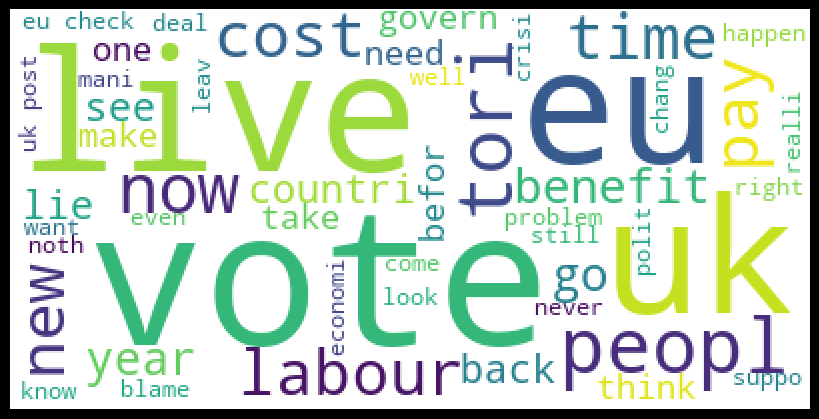

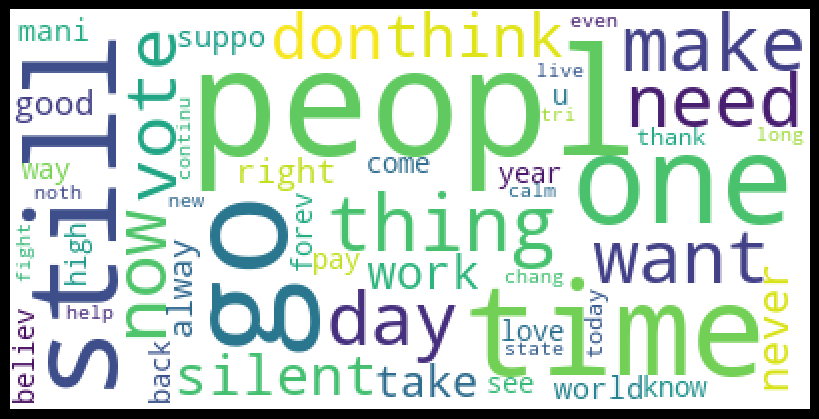

In [22]:
# stworzenie jednego tekstu na temat Brexit
brexit_text = " ".join([" ".join(tweet) for tweet in brexit_cleaned_tweets])
# stworzenie jednego tekstu na temat Remain
remain_text = " ".join([" ".join(tweet) for tweet in remain_cleaned_tweets])

# generowanie chmur słów
generate_wordcloud(brexit_text) # chmura słów dla Brexit
generate_wordcloud(remain_text) # chmura słów dla Remain

In [23]:
def count_words(text):
    word_counts = {}
    for tweet in text:
        for word in tweet:
            if word not in word_counts:
                word_counts[word] = 1
            else:
                word_counts[word] += 1
    return word_counts

         Word  Count
17         eu    133
89         uk    132
120      vote    119
189      live     90
68       tori     82
170     peopl     74
1018     cost     73
63       more     65
239      good     65
2          up     63
176       now     58
243      post     58
241     check     57
1134    crisi     56
273       pay     55
203      time     49
114    labour     48
47    benefit     47
301        go     47
360      year     45
264   countri     44
498       lie     44
361      back     43
138       see     42
110       out     42
11     govern     41
349      take     41
434      need     40
450       one     40
15      befor     38
77       make     37
793      over     37
210     think     37
478      news     36
146   problem     36
52       come     35
281      leav     35
476     blame     34
90      still     33
252      want     32
105     right     32
207    realli     32
22       even     32
295        be     31
111    happen     30
196      look     30
80    economi

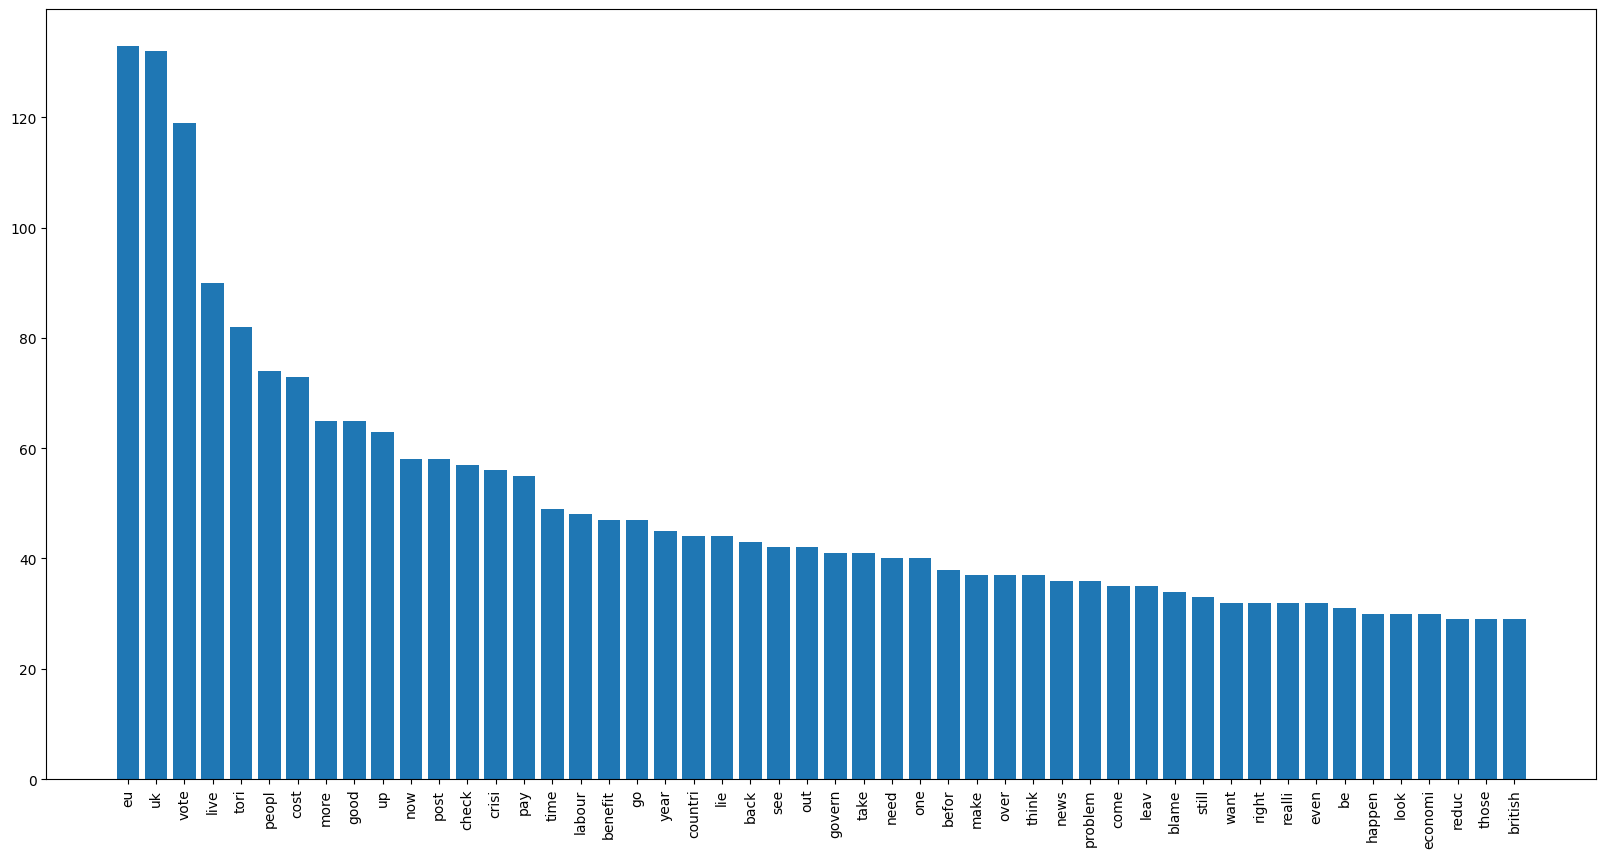

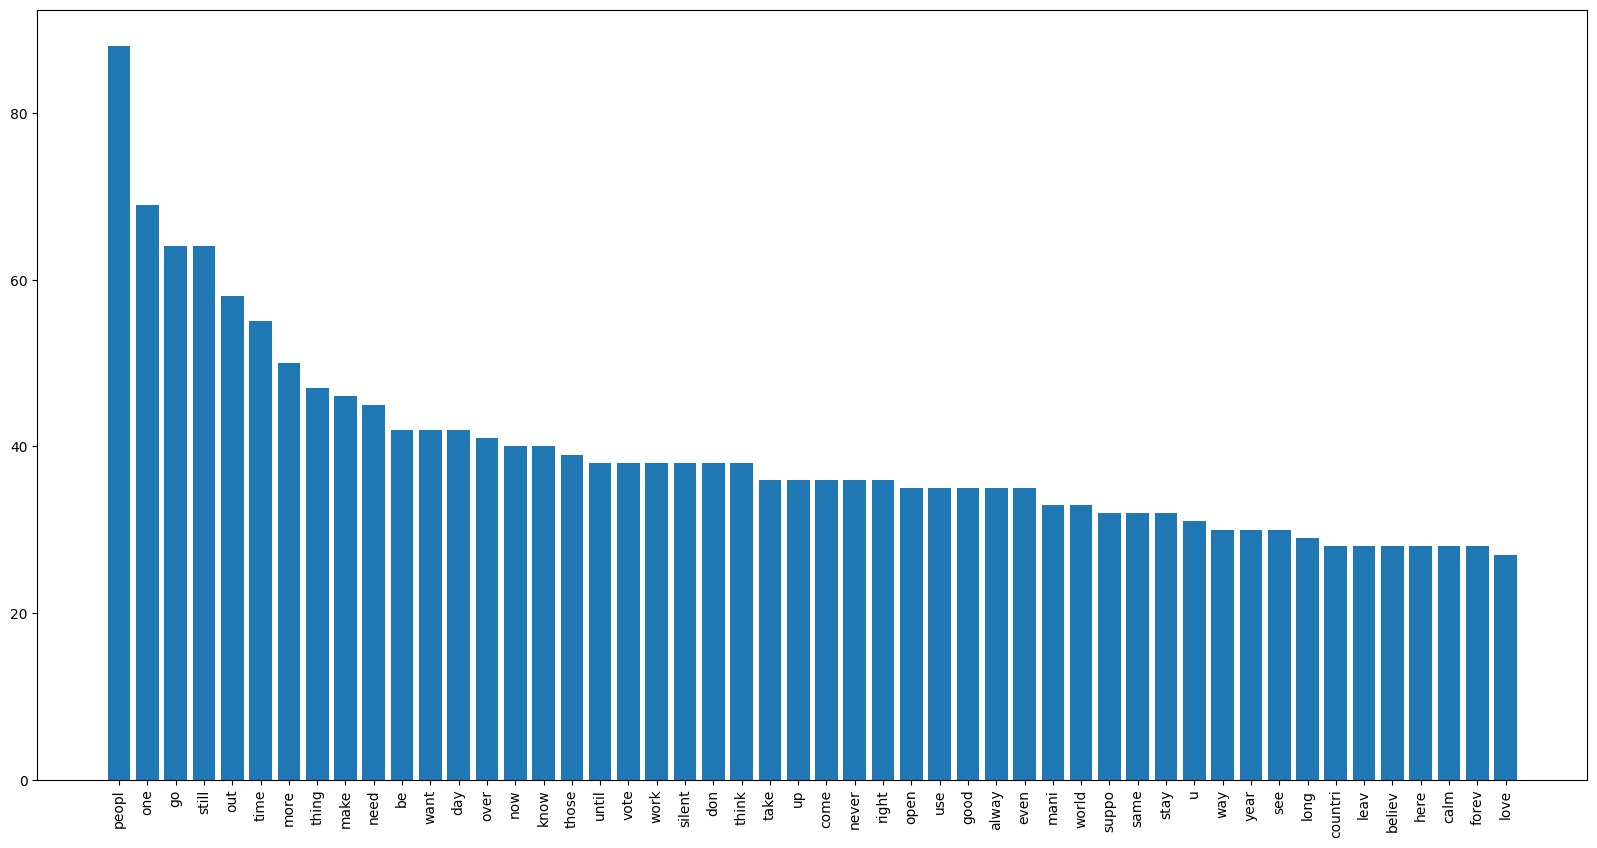

In [24]:
# policzenie słów dla Brexit
brexit_word_counts = count_words(brexit_cleaned_tweets)
# policzenie słów dla Remain
remain_word_counts = count_words(remain_cleaned_tweets)

# wyświetlenie 50 najczęściej używanych słów dla Brexit
brexit_top_50 = pd.DataFrame(list(brexit_word_counts.items()),columns = ['Word','Count']).sort_values(by=['Count'], ascending=False).head(50)
print(brexit_top_50)

# wyświetlenie 50 najczęściej używanych słów dla Remain
remain_top_50 = pd.DataFrame(list(remain_word_counts.items()),columns = ['Word','Count']).sort_values(by=['Count'], ascending=False).head(50)
print(remain_top_50)

# wykres kolumnowy dla 50 najczęściej używanych słów dla Brexit
plt.figure(figsize=[20,10])
plt.bar(brexit_top_50["Word"], brexit_top_50["Count"])
plt.xticks(rotation=90)
plt.show()

# wykres kolumnowy dla 50 najczęściej używanych słów dla Remain
plt.figure(figsize=[20,10])
plt.bar(remain_top_50["Word"], remain_top_50["Count"])
plt.xticks(rotation=90)
plt.show()

In [25]:
#Rozbicie tweetów dotyczących Brexitu i pozostania w UE na pojedyncze słowa

brexit_words = set(brexit_text.split())
remain_words = set(remain_text.split())

In [26]:
#Różnice zbiorów

diff_words1 = brexit_words - remain_words
diff_words2 = remain_words - brexit_words

In [27]:
#Część wspólna zbiorów

common_words = brexit_words.intersection(remain_words)

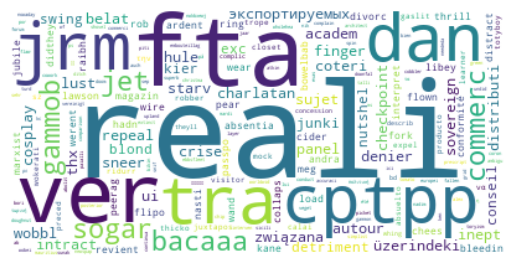

In [31]:
#CHmura słów dla zbioru Brexit\Remain

wordcloud = WordCloud(background_color="white").generate(" ".join(diff_words1))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

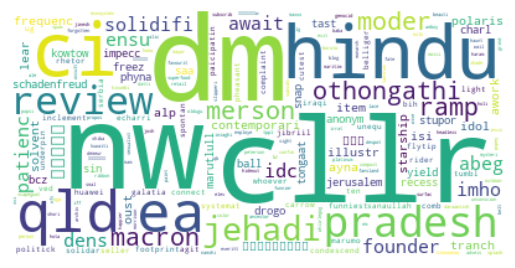

In [32]:
#Chmura słów dla zbioru Remain\Brexit

wordcloud = WordCloud(background_color="white").generate(" ".join(diff_words2))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

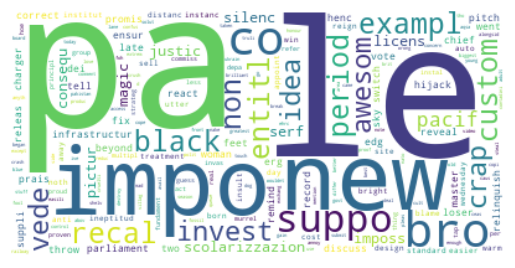

In [34]:
#Chmura słów dla części wspólnej z obu zbiorów

wordcloud = WordCloud(background_color="white").generate(" ".join(common_words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()